# Projeto

Neste projeto, vamos usar o conceito de entropia e tudo o que analisamos até o momento para fazer um jogador de forca.

1. Vamos instanciar uma classe JogodeForca, que defini logo abaixo. As regras estão no próprio código para não serem ambíguas.
1. O vocabulário permitido é o que está na URL `https://www.ime.usp.br/~pf/dicios/br-sem-acentos.txt`, e o jogador pode ter acesso a esse vocabulário.
1. O objetivo da atividade é fazer um jogador automático de forca que ganha o máximo de vezes possível com apenas 5 vidas.
1. Ao criar um novo jogo, o jogador recebe a informação de quantas letras a palavra tem.
1. Em uma jogada típica, o jogador escolhe uma letra. O "juiz" retorna ua lista com os índices em que essa letra aparece na palavra secreta. Se a letra não aparece, retorna uma lista vazia e o jogador perde uma vida.
1. A qualquer momento, o jogador pode consultar suas vidas (`jogo.vidas`), mas, obviamente, não pode consultar a palavra escolhida.
1. O jogador ganha quando, por saber qual palavra foi escolhida, usa o método `tentar_palavra` informando a palavra correta. Se usar o método mas não acertar, perde o jogo imediatamente.
1. Sempre que o jogador ganha o juiz retorna `True`. Quando ele perde, retorna `False`.


In [84]:
import random
class JogoDeForca:
    def __init__(self):
        import requests
        url = 'https://www.ime.usp.br/~pf/dicios/br-sem-acentos.txt'
        r = requests.get(url, allow_redirects=True)
        if r.status_code==200:
            self.content = str(r.content.decode()).split('\n')
        else:
            print("Erro: ", r.status_code)
            
    # Iniciar um novo jogo
    def novo_jogo(self, vidas=5):
        self.vidas = vidas
        self.palavra = random.choice(self.content)
        return len(self.palavra)
    
    # Tentar uma letra
    def tentar_letra(self, letra):
        if self.vidas > 0:
            if letra in self.palavra:
                return [idx for idx in range(len(self.palavra)) if self.palavra[idx]==letra]
            else:
                self.vidas -= 1
                if self.vidas == 0:
                    print("Fim de jogo!")
                    return False
                else:
                    return []
                
    # Tentar a palavra inteira  
    def tentar_palavra(self, palavra):
        if self.vidas > 0:
            if self.palavra == palavra:
                print ("Ganhou!")
                return True
            else:
                self.vidas = 0
                print("Fim de jogo!")
                return False

## Explicando algoritmo do jogo da forca

Esse código define uma função "main" que recebe um objeto "jogo" como argumento. A função roda o jogo da forca 100 vezes e conta quantas vezes o jogador ganha. Dentro do loop "for" que executa o jogo 100 vezes, o código filtra uma lista de palavras do jogo de acordo com o tamanho da palavra escolhida aleatoriamente e a armazena na variável "palavras". Em seguida, a palavra escolhida é impressa na tela. O código então cria um dicionário chamado "letras", onde as chaves são as letras das palavras filtradas e os valores são a quantidade de vezes que cada letra aparece nessas palavras. O dicionário é ordenado em ordem decrescente de frequência e a lista de letras resultante é armazenada na variável "lista_letras".  

O código então inicia um loop "while" que executa até que o jogador tenha perdido todas as suas vidas. Dentro desse loop, o código escolhe a letra mais frequente da lista de letras não tentadas e a tenta no jogo. Se a letra escolhida estiver na palavra, o código atualiza a lista de palavras filtradas para incluir apenas as palavras que contêm a letra nas mesmas posições em que ela aparece na palavra. Se a letra não estiver na palavra, o código atualiza a lista de palavras filtradas para incluir apenas as palavras que não contêm a letra. 

O código também atualiza as listas de letras tentadas, letras acertadas e letras erradas. Ele cria um novo dicionário "letras" com as letras que aparecem nas palavras filtradas e a quantidade de vezes que elas aparecem. Esse dicionário é novamente ordenado em ordem decrescente de frequência e a lista de letras resultante é armazenada em "lista_letras". Se a lista de letras estiver vazia, isso significa que o jogo não conseguiu adivinhar a palavra correta. Nesse caso, a função "tentar_palavra" é chamada com a palavra restante da lista de palavras filtradas. Se houver apenas uma palavra na lista de palavras filtradas, isso significa que o jogo acertou a palavra e a função "tentar_palavra" é chamada com essa palavra.

No final da função, o número de vitórias do jogador é retornado.

In [85]:
def main(jogo):
    

    jogo.novo_jogo()

    #filtrar as palavras com o mesmo tamanho da palavra escolhida aleatoriamente
    palavras = [palavra for palavra in jogo.content if len(palavra) == len(jogo.palavra)]

    #print a palavra
    print()
    print("A palavra é: ", jogo.palavra)

    #criar um dicionário com as letras e a quantidade de vezes que elas aparecem nas palavras filtradas
    letras = {}
    for palavra in palavras:
        for letra in palavra:
            if letra in letras:
                letras[letra] += 1
            else:
                letras[letra] = 1

    # criar um dicionários com as letras que aparecem nas palavras filtradas como chaves e a frequencia que elas aparecem como valores. Os valores estão ordenados de forma decrescente.
    d_sorted_values = dict(sorted(letras.items(), key=lambda item: item[1],reverse=True))
    print(d_sorted_values)
    # criar uma lista com as letras do dicionário
    lista_letras = []
    for l in d_sorted_values.keys():
        lista_letras.append(l)
    # criar lista de letras tentadas, letras tentadas acertadas e letras tentadas erradas.
    letras_tentadas = []
    letras_acertadas = []
    letras_erradas = []

    # percorrer as letras do dicionario 
    while jogo.vidas > 0:
        if len(palavras) == 1 or len(d_sorted_values) == 0:
            return jogo.tentar_palavra(palavras[0]) 
        letra = lista_letras[0]
        print(letra)
        # se a lista das palavras tiver tamanho 1, então achou a palavra e chama o método tentar_palavra.
        # tenta a letra 
        tentativa_letra = jogo.tentar_letra(letra)
        print(tentativa_letra)
        novas_palavras = []
        # se a letra está na palavra
        if tentativa_letra != [] and tentativa_letra != False:
            # adiciona a letra na lista de letras acertadas.
            letras_acertadas.append(letra)

            # faz a nova filtragem com as palavras que possuem as letras no mesmo índice da escolhida.
            for palavra in palavras:
                if letra in palavra:
                    lista_index = [idx for idx in range(len(palavra)) if palavra[idx]==letra]
                    
                    
                    
                    if lista_index == tentativa_letra:
                        
                        novas_palavras.append(palavra)
        # se a letra não está na palavra
        else:
            # adiciona a letra na lista de letras erradas.
            letras_erradas.append(letra)

            # faz a nova filtragem com as palavras que não possuem a letra que não está na palavra escolhida.
            for palavra in palavras:
                if letra not in palavra:
                    novas_palavras.append(palavra)

        # atualiza a lista de palavras com as novas palavras filtradas.
        palavras = novas_palavras
        print(len(palavras))
        letras_tentadas.append(letra)

        # cria um novo dicionário com as letras e a quantidade de vezes que elas aparecem nas palavras filtradas
        letras = {}
        
        for palavra in palavras:    
            for letra_errada,letra_acertada in zip(letras_erradas,letras_acertadas):
                if palavra.count(letra_errada) != 0 or palavra.count(letra_acertada)==0:
                    break

            for letra in palavra:
                if letra not in letras_tentadas:
                    if letra in letras:
                        letras[letra] += 1
    
                    else:
                        letras[letra] = 1  
        
        # atualiza o dicionário das letras das palavras filtradas e a frequência delas.            
        d_sorted_values = dict(sorted(letras.items(), key=lambda item: item[1],reverse=True))
        print(d_sorted_values)
        
            
        lista_letras = []
        
        for l in d_sorted_values.keys():
            lista_letras.append(l)


In [87]:
jogo = JogoDeForca()
vits = 0
loss = 0

for i in range(100):
    new_game = main(jogo)
    
    if new_game == True :
        vits += 1
    else:
        loss += 1

print()
print("------------Placar------------ ")
print()
print("Vitórias: ", vits)
print()
print("Derrotas: ", loss)
print()
print("-------------------------------")



A palavra é:  equiparam
{'a': 53260, 'e': 39339, 's': 31894, 'r': 31718, 'i': 28819, 'o': 24730, 'm': 17759, 't': 14248, 'n': 13601, 'c': 13254, 'd': 11970, 'u': 9906, 'l': 9563, 'p': 7320, 'v': 6754, 'g': 5155, 'b': 4606, 'f': 4179, 'h': 2784, 'z': 1666, 'j': 1435, 'x': 1330, 'q': 1134, 'A': 25, 'D': 10, 'B': 7, 'C': 6, 'E': 6, 'M': 6, 'F': 5, 'P': 4, 'G': 2, 'w': 2, 'H': 2, 'I': 2, 'k': 2, 'T': 2, 'J': 1, 'N': 1, 'R': 1, 'S': 1, 'V': 1}
a
[5, 7]
1931
{'r': 1842, 'e': 1519, 's': 1314, 'o': 1152, 'm': 1034, 'i': 923, 'v': 808, 'c': 697, 't': 682, 'd': 610, 'u': 568, 'n': 509, 'l': 495, 'p': 276, 'b': 259, 'g': 250, 'f': 224, 'h': 101, 'x': 91, 'j': 83, 'z': 44, 'q': 36}
r
[6]
529
{'e': 400, 'o': 392, 's': 317, 'm': 299, 'i': 278, 'c': 204, 't': 201, 'u': 181, 'l': 168, 'n': 150, 'd': 144, 'b': 72, 'f': 72, 'p': 70, 'v': 57, 'g': 54, 'j': 33, 'x': 30, 'h': 21, 'z': 18, 'q': 13}
e
[0]
109
{'s': 99, 'o': 90, 'm': 69, 'c': 39, 'u': 37, 't': 36, 'n': 33, 'i': 29, 'p': 19, 'l': 18, 'b': 18,

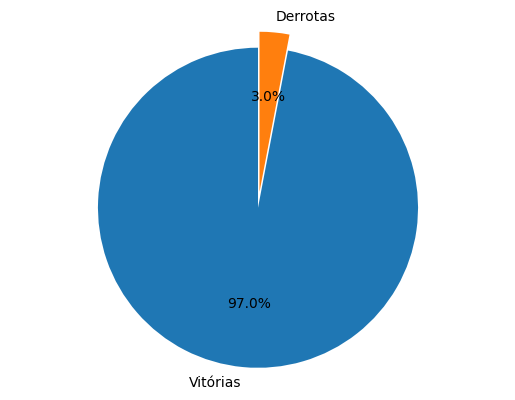

In [88]:
#plotar grafico da porcentagem de vitórias e derrotas
import matplotlib.pyplot as plt

labels = 'Vitórias', 'Derrotas'
sizes = [vits, loss]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Derrotas')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()